<a href="https://colab.research.google.com/github/apchavezr/VISUALIZACION_DATOS_TOMA-DECISIONES/blob/main/EDA_MinEducacion_Calificaciones_Explicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA) - Ministerio de Educación Nacional

Este cuaderno presenta un ejemplo práctico de análisis exploratorio de datos (EDA) utilizando datos simulados inspirados en la Encuesta de Percepción 2021 del Ministerio de Educación Nacional de Colombia. El objetivo es ilustrar cómo se puede analizar la variable **calificación de atención** en distintas instituciones de educación superior (IES), diferenciando entre públicas y privadas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo visual
sns.set(style="whitegrid")

# Simulación de datos
np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Tipo_IES': ['Pública'] * (n//2) + ['Privada'] * (n//2),
    'Calificacion_Atencion': (
        np.concatenate([
            np.random.normal(loc=4.0, scale=0.5, size=n//2),
            np.random.normal(loc=3.5, scale=0.6, size=n//2)
        ])
    )
})

# Limitar los valores entre 1 y 5, como en una escala Likert
data['Calificacion_Atencion'] = data['Calificacion_Atencion'].clip(1, 5).round(1)
data.to_csv("encuesta_percepcion_2021.csv", index=False)
data.head()


,Tipo_IES,Calificacion_Atencion
0,Pública,4.2
1,Pública,3.9
2,Pública,4.3
3,Pública,4.8
4,Pública,3.9


## Visualización 1: Histograma

A continuación, se presenta un histograma que permite observar la **distribución general** de las calificaciones de atención dadas por las IES. Esta gráfica es útil para identificar la forma de la distribución, su simetría, picos o posibles valores atípicos.


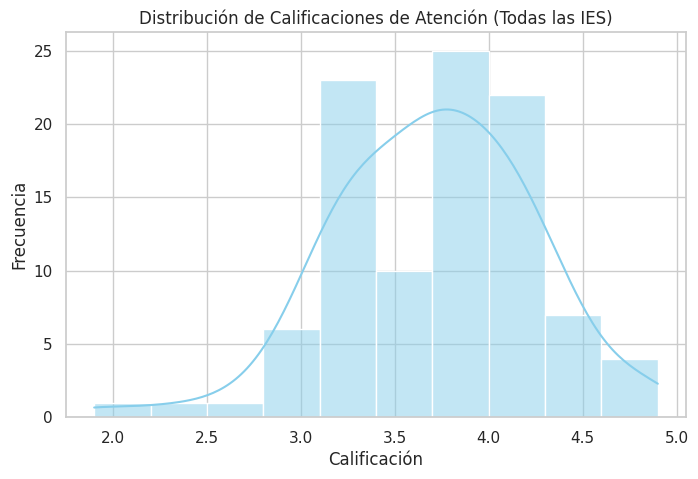

In [2]:
datos = pd.read_csv('encuesta_percepcion_2021.csv')

plt.figure(figsize=(8, 5))
sns.histplot(datos['Calificacion_Atencion'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de Calificaciones de Atención (Todas las IES)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


## Visualización 2: Diagrama de Caja (Boxplot)

El boxplot permite comparar la distribución de las calificaciones entre **IES públicas y privadas**. Esta visualización es clave para identificar diferencias en la mediana, el rango intercuartílico y la presencia de valores atípicos.


<ipython-input-3-0fa381589f60>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo_IES', y='Calificacion_Atencion', data=datos, palette='pastel')


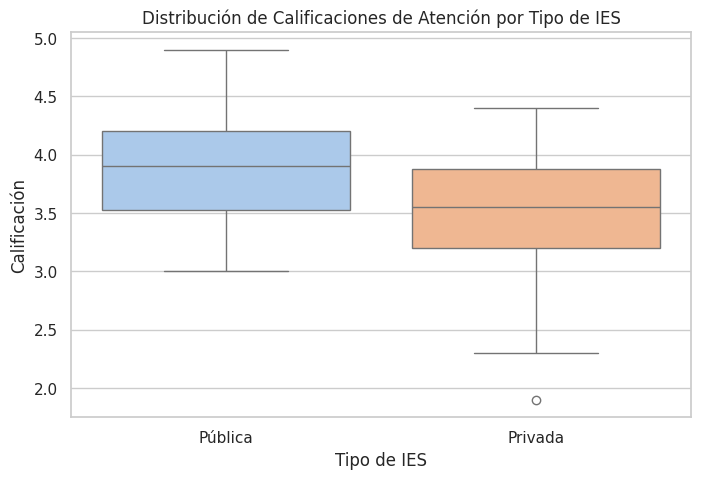

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Tipo_IES', y='Calificacion_Atencion', data=datos, palette='pastel')
plt.title('Distribución de Calificaciones de Atención por Tipo de IES')
plt.xlabel('Tipo de IES')
plt.ylabel('Calificación')
plt.show()


## Conclusiones

- El **histograma** muestra que las calificaciones tienden a concentrarse en valores altos (entre 3.5 y 4.5), indicando una percepción generalmente positiva por parte de las IES.
- El **boxplot** permite observar que las IES públicas tienden a reportar una calificación media ligeramente superior a las privadas, aunque ambas presentan valores dentro de un rango similar.
- Estas visualizaciones son útiles para realizar un análisis preliminar antes de aplicar pruebas estadísticas como ANOVA o pruebas no paramétricas.

Este tipo de análisis es aplicable en contextos reales de política educativa, gestión institucional y evaluación de la calidad del servicio público.
